In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../Code/')

In [3]:
from coding_V0_NR import *
import matplotlib.pyplot as plt
import networkx as nx

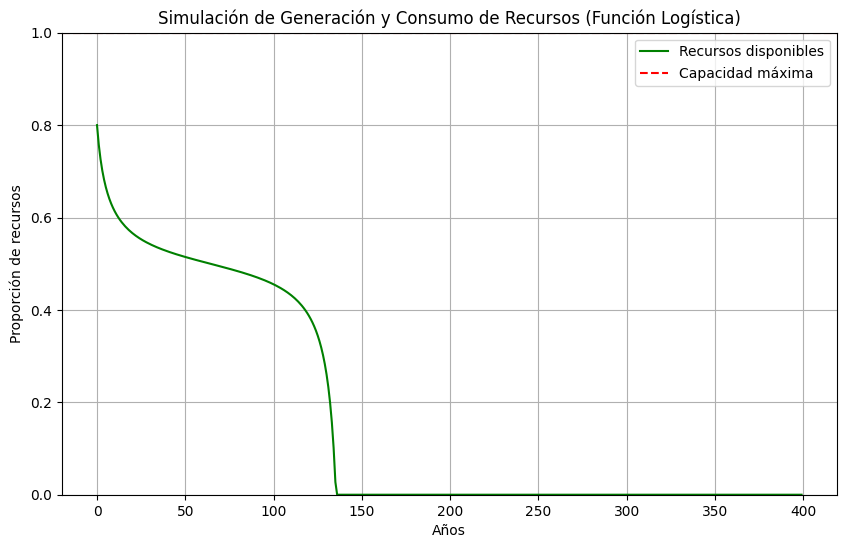

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
initial_resources = 0.8  # Recurso inicial
growth_rate = 0.46  # Tasa de crecimiento intrínseca del recurso (r)
consumption_rate = 0.116  # Consumo anual de recurso 
max_capacity = 1  # Capacidad máxima del recurso (K)

# Tiempo
years = 400  # Simulación por 50 años
time = np.arange(0, years)

# Inicialización de variables
resources = np.zeros(years)  # Array para almacenar la cantidad de recurso cada año
resources[0] = initial_resources

# Función logística de crecimiento
def logistic_growth(R, r, K):
    return r * R * (1 - R / K)

# Simulación del modelo
for t in range(1, years):
    # Crecimiento logístico del recurso
    growth = logistic_growth(resources[t-1], growth_rate, max_capacity)
    
    # Actualizar la cantidad de recurso disponible (después de generación y consumo)
    resources[t] = resources[t-1] + growth - consumption_rate
    
    # Evitar que la cantidad de recursos sea negativa
    if resources[t] < 0:
        resources[t] = 0

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(time, resources, label="Recursos disponibles", color="green")
plt.axhline(y=max_capacity, color='r', linestyle='--', label="Capacidad máxima")
plt.title("Simulación de Generación y Consumo de Recursos (Función Logística)")
plt.xlabel("Años")
plt.ylabel("Proporción de recursos")
plt.legend()
plt.ylim(0,1)
plt.grid(True)
plt.show()

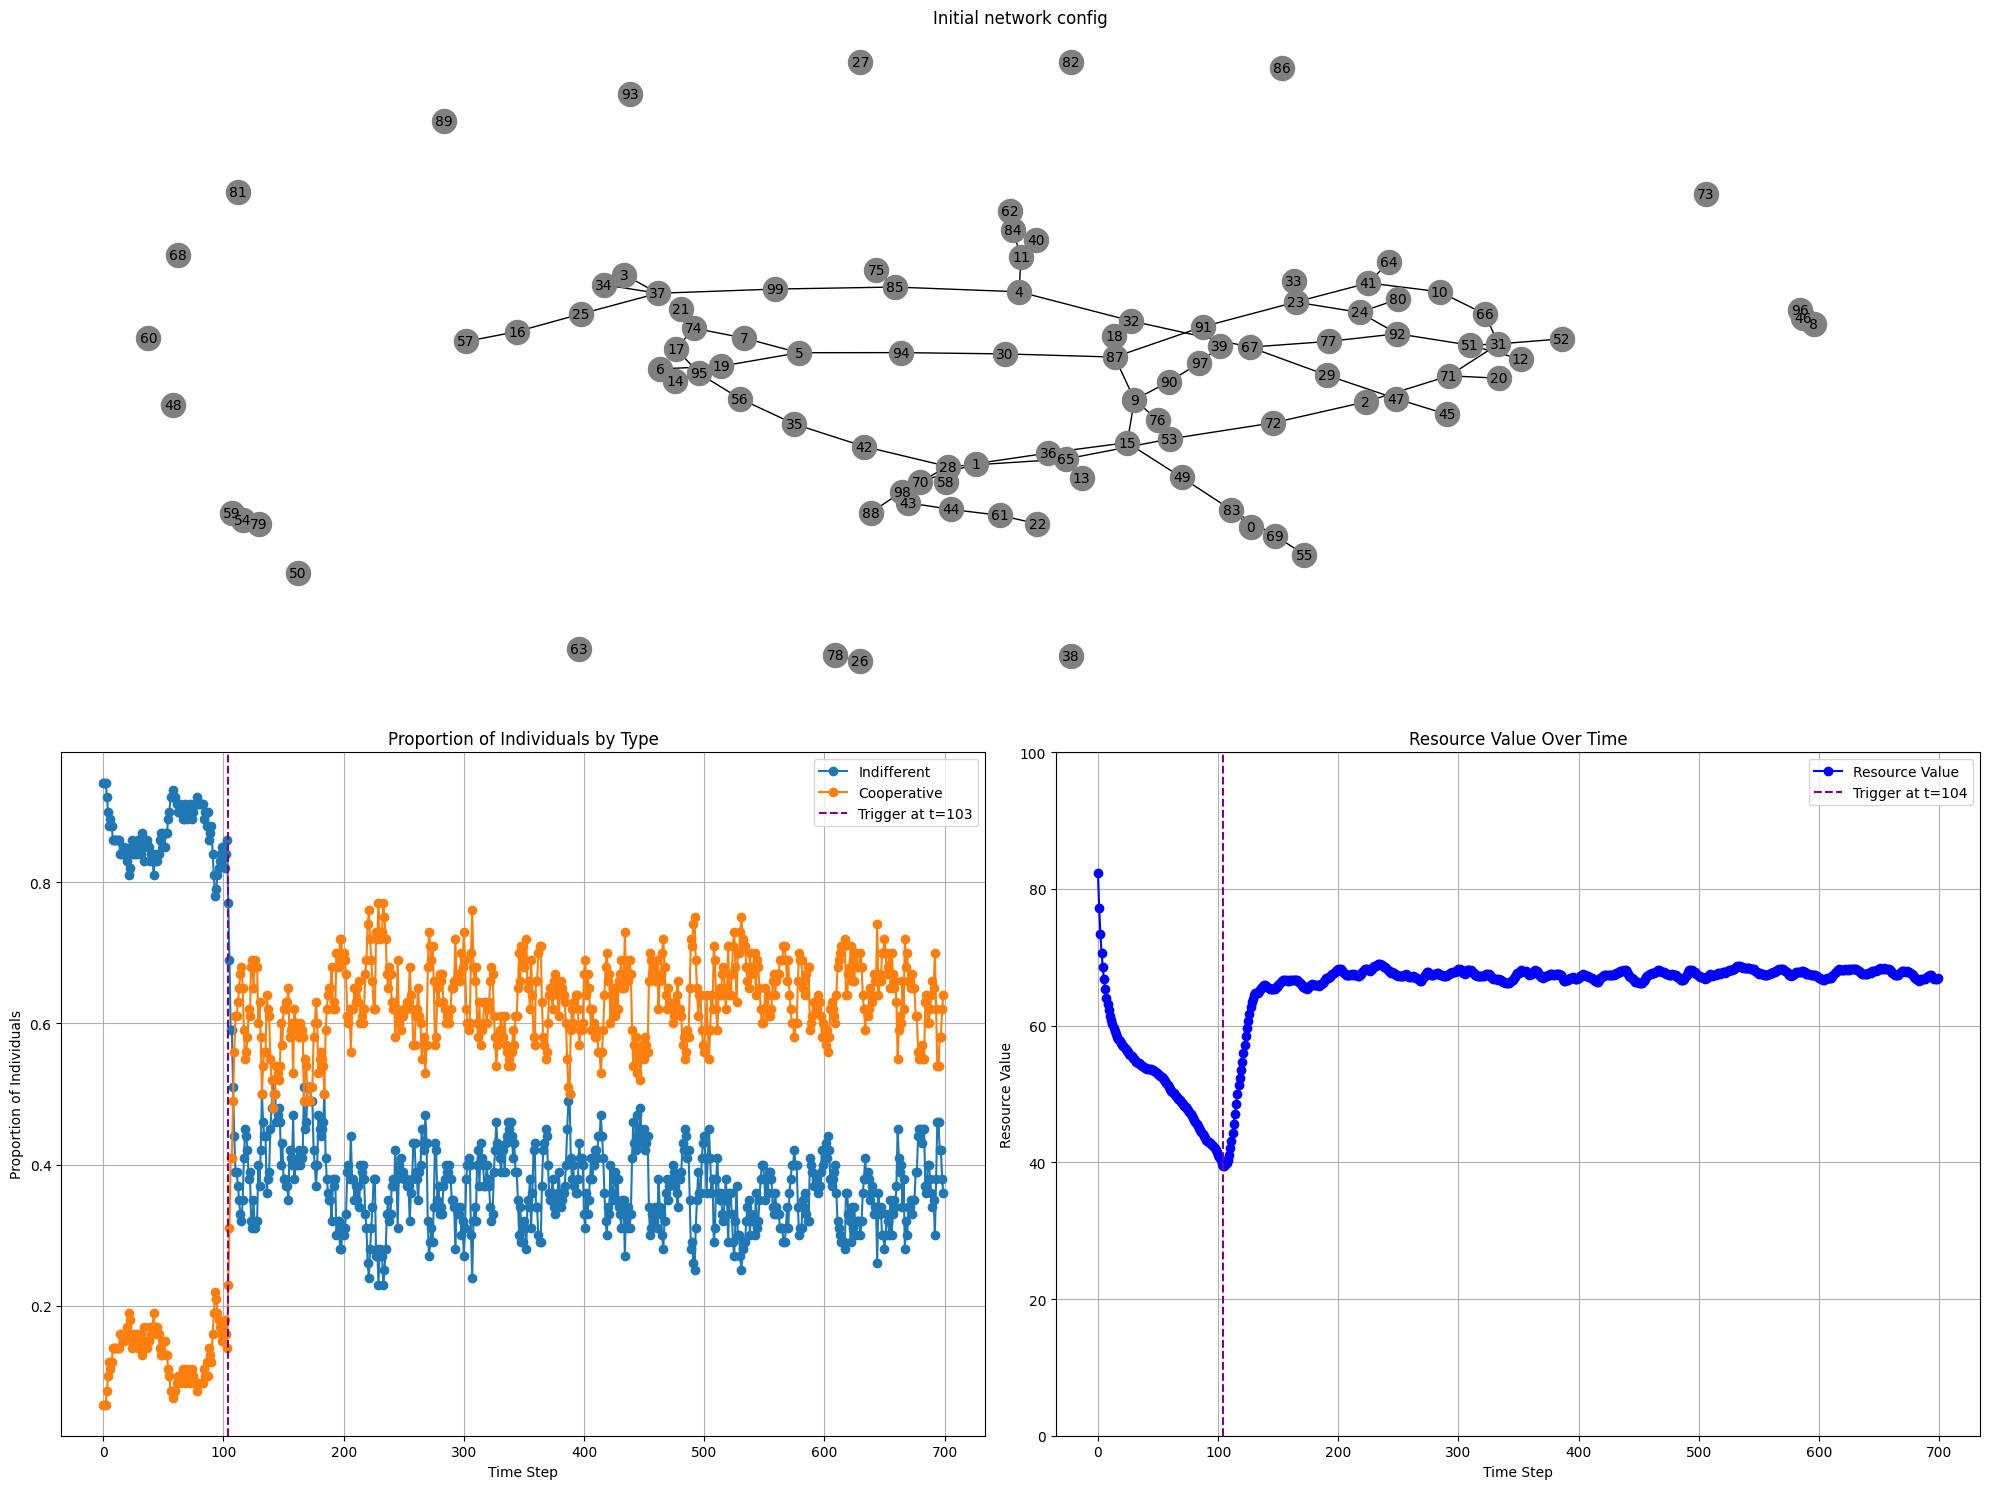

In [126]:
# Simulation Parameters
num_individuals = 100  # Number of individuals in the graph
p_cooperative = 0.05  # Initial fraction of cooperative individuals
beta = 0.08  # Probability parameter for cooperation
mu = 0.1  # Constant probability of becoming indifferent
T = 700  # Number of time steps

# Resource parameters
initial_resource = 90  # Initial value of the resource
max_capacity = 100
replenishment_proportion = 0.46  # 46% of the remaining resource is replenished each step
consumption_rates = {'Indifferent': 12, 'Cooperative': 9}  # Consumption rates for each type

# Critical resource parameters
critical_value = 40 # If the resource drops below this value, extra cooperation probability is triggered
rho = 0.1  # Extra cooperation probability when the critical resource threshold is crossed

# Example: Erdos-Renyi graph
graph = nx.erdos_renyi_graph(num_individuals, 0.02)

# Initialize and run the model
model = ABMModel(graph, p_cooperative, beta, mu, T, initial_resource, replenishment_proportion, consumption_rates, critical_value, rho, max_capacity)

# Run the simulation
model.run()

# Get the history of the simulation
history = model.get_history()
resource_history = model.get_resource_history()

# Convert history into time series data for plotting
timesteps = range(T)
indifferent_proportions = [h['Indifferent'] for h in history]
cooperative_proportions = [h['Cooperative'] for h in history]

# Create a figure with a grid layout: 2 rows (1 plot on the first row, 2 on the second)
fig = plt.figure(figsize=(20, 15))
grid = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Define grid spec (1st row, centered; 2nd row with two plots)

# First plot: Initial network (spanning the first row)
ax0 = fig.add_subplot(grid[0, :])  # This spans both columns in the first row
ax0.set_title("Initial network config")
pos = nx.spring_layout(graph)  # Layout for the graph
nx.draw(graph, pos, ax=ax0, node_color='gray', with_labels=True, node_size=300, font_size=10)

# Second plot: Proportion of individuals by type
ax1 = fig.add_subplot(grid[1, 0])  # Left plot on second row
ax1.plot(timesteps, indifferent_proportions, label='Indifferent', marker='o')
ax1.plot(timesteps, cooperative_proportions, label='Cooperative', marker='o')
if model.trigger_time is not None:
    ax1.axvline(x=model.trigger_time, color='purple', linestyle='--', label=f'Trigger at t={model.trigger_time-1}')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Proportion of Individuals')
ax1.set_title('Proportion of Individuals by Type')
ax1.legend()
ax1.grid(True)

# Third plot: Resource consumption over time
ax2 = fig.add_subplot(grid[1, 1])  # Right plot on second row
ax2.plot(timesteps, resource_history, label='Resource Value', color='blue', marker='o')
if model.trigger_time is not None:
    ax2.axvline(x=model.trigger_time, color='purple', linestyle='--', label=f'Trigger at t={model.trigger_time}')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Resource Value')
ax2.set_title('Resource Value Over Time')
ax2.axhline(100, color = 'r')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True)

# Adjust layout and show the figure
plt.tight_layout()

#save the figure

# Define the file name structure based on the parameters
file_name = (
    f'sim_ErdosRenyi_p_coop_{p_cooperative}_beta_{beta}_mu_{mu}_T_{T}_'
    f'resource_{initial_resource}_replenishment_{replenishment_proportion}_'
    f'critical_{critical_value}_rho_{rho}.png'
)

# Replace any special characters or spaces with underscores to ensure compatibility
file_name = file_name.replace(".", "_")

# Define the full path where the file will be saved
PATH_TO_SAVE = "../Output/Images/V0_NR/"

# Save the figure using the structured file name
#plt.savefig(os.path.join(PATH_TO_SAVE, file_name))

# Show the figure
plt.show()


In [77]:
resource_history[-1]

50.30600677668457

In [78]:
cooperative_proportions[-1]

1.0